<a href="https://colab.research.google.com/github/ontenkutsenko/NLP_Airbnb_Delisting_Prediction/blob/main/Baseline.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install langdetect

In [2]:
!pip install deep_translator

In [3]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from langdetect import detect, DetectorFactory
from wordcloud import WordCloud
from collections import Counter
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import SnowballStemmer
import nltk
import re
from deep_translator import GoogleTranslator
import time
from IPython.display import clear_output

nltk.download('stopwords')
nltk.download('punkt')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [4]:
!gdown 1Y63uPJCSWvlefU-HYpuVumaiqgjHjpb8

Downloading...
From (original): https://drive.google.com/uc?id=1Y63uPJCSWvlefU-HYpuVumaiqgjHjpb8
From (redirected): https://drive.google.com/uc?id=1Y63uPJCSWvlefU-HYpuVumaiqgjHjpb8&confirm=t&uuid=4d30d8e6-ef86-4d97-a7c9-2864477e0c0b
To: /content/Project Corpora.zip
100% 55.4M/55.4M [00:00<00:00, 173MB/s]


In [5]:
!unzip '/content/Project Corpora.zip'

Archive:  /content/Project Corpora.zip
replace Project Corpora/test.xlsx? [y]es, [n]o, [A]ll, [N]one, [r]ename: A
  inflating: Project Corpora/test.xlsx  
  inflating: Project Corpora/test_reviews.xlsx  
  inflating: Project Corpora/train.xlsx  
  inflating: Project Corpora/train_reviews.xlsx  


In [6]:
!rm '/content/Project Corpora.zip'

In [7]:
df_train = pd.read_excel('/content/Project Corpora/train.xlsx')
df_train_reviews = pd.read_excel('/content/Project Corpora/train_reviews.xlsx')
df_test = pd.read_excel('/content/Project Corpora/test.xlsx')
df_test_reviews = pd.read_excel('/content/Project Corpora/test_reviews.xlsx')

In [8]:
df_train

,index,description,host_about,unlisted
0,1,"This is a shared mixed room in our hostel, wit...",Alojamento Local Registro: 20835/AL,0
1,2,"O meu espaço fica perto de Parque Eduardo VII,...","I am friendly host, and I will try to always b...",1
2,3,Trafaria’s House is a cozy and familiar villa ...,"I am a social person liking to communicate, re...",1
3,4,"Apartamento Charmoso no Chiado, Entre o Largo ...",Hello!_x000D_\nI m Portuguese and i love to me...,0
4,5,Joli appartement en bordure de mer.<br /> 2 m...,Nous sommes une famille avec deux enfants de 1...,0
...,...,...,...,...
6243,6244,"Studio 15 is a new, very well decorated and co...",I'm a Brand Manager from Lisbon in Portugal bu...,0
6244,6245,Lisbon meets a cosmopolitan industrial one-bed...,Home is where feelings are visitors. How do we...,0
6245,6246,<b>License number</b><br />Exempt,I am a travel agent passionate by cultures. \n...,1
6246,6247,Campo Pequeno Prestige is a classy and top qua...,Família_x000D_\nPortugal_x000D_\nGavião_x000D_...,0


In [9]:
df_train_reviews.head(30)

,index,comments
0,1,this is a very cozy and comfortable house to s...
1,1,good<br/>
2,1,"My first hostel experience, and all I have to ..."
3,1,Das Hostel war neu und deshalb funktionierte a...
4,1,"It was fine for a dorm, but I think for the pe..."
5,1,Our stay in Lisbon Tip Hostel was very good. T...
6,1,Close to shops in town and a comfortable place...
7,1,Young and friendly staff. Great location along...
8,1,The place is just off the Parque metro stop wh...
9,1,Had a nice stay at this hostel. The beds were ...


# Exploration

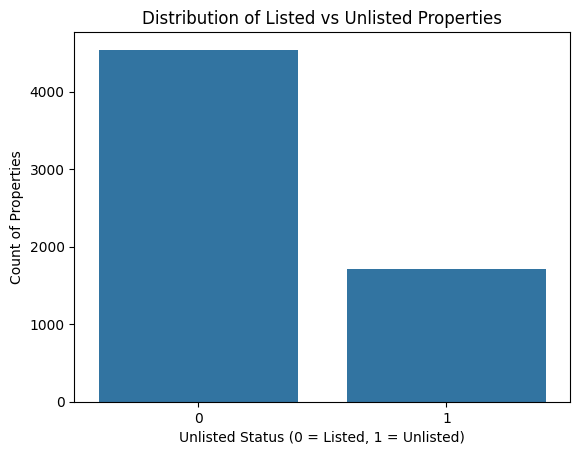

In [10]:
# distribution of classes

sns.countplot(x='unlisted', data=df_train)
plt.title('Distribution of Listed vs Unlisted Properties')
plt.xlabel('Unlisted Status (0 = Listed, 1 = Unlisted)')
plt.ylabel('Count of Properties')
plt.show()

In [11]:
# Let's create a wordcloud

def plot_word_cloud(text_series):
    text = ' '.join(text_series.dropna()).lower()
    wordcloud = WordCloud(width = 800, height = 400, background_color ='white').generate(text)
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud)
    plt.axis("off")
    plt.show()

Word Cloud for description


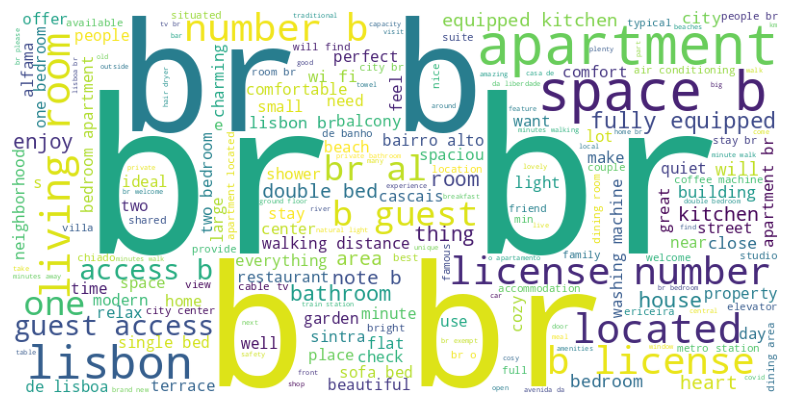

Word Cloud for host_about


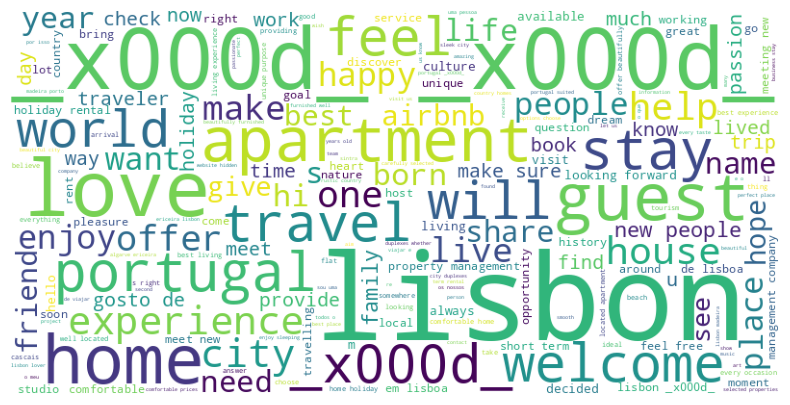

Word Cloud for comments


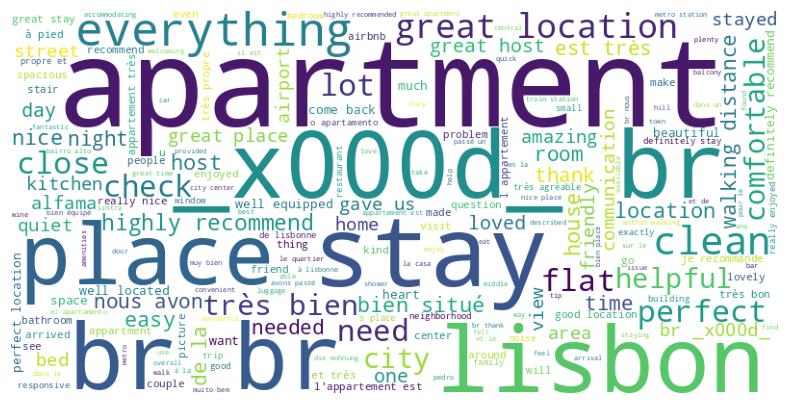

In [12]:
# For df_train
for column in ['description', 'host_about']:
    print(f"Word Cloud for {column}")
    plot_word_cloud(df_train[column])

# For df_train_reviews
print("Word Cloud for comments")
plot_word_cloud(df_train_reviews['comments'])

# Data Preprocessing

In [13]:
# Let's check examples where those unwanted words appear

def display_sentences_with_substring(df, column, substring, num_sentences=5):
    contains_substring = df[df[column].str.contains(substring, na=False, regex=False)]

    # Print examples
    print(f"Examples of sentences containing '{substring}' in {column}:")
    for example in contains_substring[column].head(num_sentences):
        print("-" * 80)
        print(example)
    print("-" * 80)

In [14]:
# Display examples from 'description' containing "br"
display_sentences_with_substring(df_train, 'description', 'br')

# Display examples from 'comments' containing "_x000d"
display_sentences_with_substring(df_train_reviews, 'comments', 'x0')

Examples of sentences containing 'br' in description:
--------------------------------------------------------------------------------
This is a shared mixed room in our hostel, with shared bathroom.<br />We are located right across the street from subway station Parque, we are 5 min walk to Marques de Pombal square.<br /><br /><b>The space</b><br />We offer woman only rooms, mixed rooms, double rooms, twins rooms, single rooms and family rooms. Our kitchen is open to all guests and  There is a lounge for the guests to gather up, with cable TV. All rooms come standard equipped with comfortable beds, linen, blankets and reading lamps on side table. Free Wi-Fi access to all guests. Here you have no curfew, access is 24/7 and we have a late check out at 11:00, so you can sleep until late!<br /><br /><b>Guest access</b><br />All rooms have key-card access.
--------------------------------------------------------------------------------
Trafaria’s House is a cozy and familiar villa where yo

#### Check for different languages

In [15]:
# check for languages

DetectorFactory.seed = 0

def detect_language(text):
    try:
        return detect(text)
    except:
        return 'error'

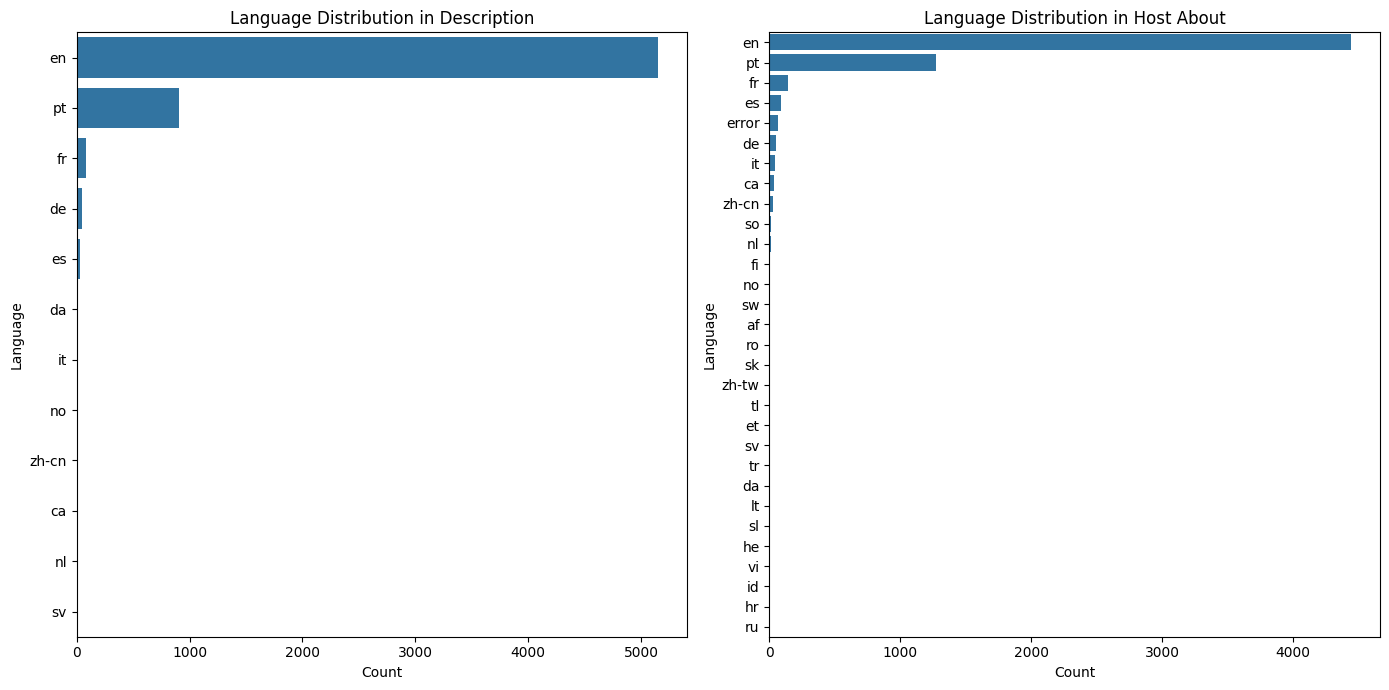

In [16]:
# check language in the two columns of df_train
df_train['lang_description'] = df_train['description'].apply(detect_language)
df_train['lang_host_about'] = df_train['host_about'].apply(detect_language)

plt.figure(figsize=(14, 7))

plt.subplot(1, 2, 1)
sns.countplot(y='lang_description', data=df_train, order = df_train['lang_description'].value_counts().index)
plt.title('Language Distribution in Description')
plt.xlabel('Count')
plt.ylabel('Language')

plt.subplot(1, 2, 2)
sns.countplot(y='lang_host_about', data=df_train, order = df_train['lang_host_about'].value_counts().index)
plt.title('Language Distribution in Host About')
plt.xlabel('Count')
plt.ylabel('Language')

plt.tight_layout()
plt.show()

In [17]:
# checking for rows where language of description and host_about don't match
mismatch_mask = df_train['lang_description'] != df_train['lang_host_about']
percentage_mismatch = (mismatch_mask.sum() / len(df_train)) * 100
percentage_mismatch

23.367477592829704

In [18]:
## Let's do same for df_train_reviews
#df_train_reviews['lang_comments'] = df_train_reviews['comments'].apply(detect_language)

#sns.countplot(y='lang_comments', data=df_train, order = df_train_reviews['lang_comments'].value_counts().index)
#plt.title('Language Distribution in Comments')
#plt.xlabel('Count')
#plt.ylabel('Language')


# takes too long will run later

#### Let's try to translate to check how long it would take

In [19]:
def translate_to_english(text, lang, index, total):
    start_time = time.time()
    if lang != 'en':
        try:
            translated_text = GoogleTranslator(source='auto', target='en').translate(text)
            elapsed_time = time.time() - start_time
            clear_output(wait=True)
            print(f"Translated row {index+1}/{total}: Took {elapsed_time:.2f} seconds")
            return translated_text
        except Exception as e:
            clear_output(wait=True)
            print(f"Failed to translate text in row {index+1}: {e}")
            return text  # Return original text if translation fails
    clear_output(wait=True)
    print(f"Skipped translation for row {index+1}/{total} as it's already in English")
    return text

In [20]:
total_rows = len(df_train)
df_train['translated_description'] = df_train.apply(lambda row: translate_to_english(row['description'], row['lang_description'], row.name, total_rows), axis=1)

Skipped translation for row 6248/6248 as it's already in English


In [22]:
df_train['translated_description'].head(30)

0     This is a shared mixed room in our hostel, wit...
1     My space is close to Parque Eduardo VII, Salda...
2     Trafaria’s House is a cozy and familiar villa ...
3     Charming Apartment in Chiado, Between Largo do...
4     Nice apartment by the sea.<br /> 2 min. walkin...
5     IMPORTANT: In response to COVID-19, this prope...
6     This is my home that I rent out when I'm trave...
7     Find tranquility in this meticulously curated ...
8     Charming apartment with one bedroom with doubl...
9     Walk up original wooden stairs to the entrance...
10    Dear guests, I have the pleaser to receive you...
11    IMPORTANT: In response to COVID-19, this prope...
12    The owner welcomes guests personally, so that ...
13    Your luxurious and romantic home away from hom...
14    Spacious apartment located right in Cais do So...
15    Supremely well located in an historical buildi...
16    Set in a stunning seaside location, this luxur...
17    This house has easy stairs access. It has 

#### Cleaning (Regular expressions, tags, tokenization, lemmatizing/stemming)

In [18]:
def preprocess_text(text, lang):
    if not pd.isna(text):
        text = re.sub(r'<br\s*/?>', ' ', text)  # Remove <br> and <br/>
        text = re.sub(r'_x000D_', ' ', text)    # Remove _x000D_
        text = re.sub(r'[^a-zA-Z\s]', ' ', text) # Remove non-alphabetic characters

        text = text.lower()

        tokens = word_tokenize(text)

        # Language mapping from ISO to SnowballStemmer
        lang_map = {
            'en': 'english',
            'de': 'german',
            'nl': 'dutch',
            'es': 'spanish',
            'it': 'italian',
            'pt': 'portuguese',
            'fr': 'french'
        }

        if lang in lang_map:
            # Set stopwords
            stops = set(stopwords.words(lang_map[lang]))
            # Initialize stemmer
            stemmer = SnowballStemmer(lang_map[lang])
            # Stemming and stopword removal
            tokens = [stemmer.stem(word) for word in tokens if word not in stops and len(word) > 1]

        return ' '.join(tokens)
    else:
        return None

In [19]:
supported_langs = ['en', 'de', 'nl', 'es', 'it', 'pt', 'fr']
df_train = df_train[df_train['lang_description'].isin(supported_langs) & df_train['lang_host_about'].isin(supported_langs)] # remove other languages in training set since it is only very few rows

df_train['processed_description'] = df_train.apply(lambda x: preprocess_text(x['description'], x['lang_description']), axis=1)
df_train['processed_host_about'] = df_train.apply(lambda x: preprocess_text(x['host_about'], x['lang_host_about']), axis=1)


<ipython-input-19-c3f641f34bd5>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_train['processed_description'] = df_train.apply(lambda x: preprocess_text(x['description'], x['lang_description']), axis=1)
<ipython-input-19-c3f641f34bd5>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_train['processed_host_about'] = df_train.apply(lambda x: preprocess_text(x['host_about'], x['lang_host_about']), axis=1)


In [20]:
df_train.head(10)

,index,description,host_about,unlisted,lang_description,lang_host_about,processed_description,processed_host_about
0,1,"This is a shared mixed room in our hostel, wit...",Alojamento Local Registro: 20835/AL,0,en,pt,share mix room hostel share bathroom locat rig...,aloj local registr al
1,2,"O meu espaço fica perto de Parque Eduardo VII,...","I am friendly host, and I will try to always b...",1,pt,en,espa fic pert parqu eduard vii saldanh estefan...,friend host tri alway around need anyth though...
2,3,Trafaria’s House is a cozy and familiar villa ...,"I am a social person liking to communicate, re...",1,en,en,trafaria hous cozi familiar villa facil need r...,social person like communic read travel like c...
3,4,"Apartamento Charmoso no Chiado, Entre o Largo ...",Hello!_x000D_\nI m Portuguese and i love to me...,0,pt,en,apart charmos chi larg carm travess trindad es...,hello portugues love meet peopl around word ma...
4,5,Joli appartement en bordure de mer.<br /> 2 m...,Nous sommes une famille avec deux enfants de 1...,0,fr,fr,jol appart bordur mer min pied plag vu magnif ...,famill deux enfant an hab pend plusieur ann po...
5,6,"IMPORTANT: In response to COVID-19, this prope...","Hi, we are Homing - a company that develops it...",0,en,en,import respons covid properti extend clean dis...,hi home compani develop activ tourism provid g...
6,7,This is my home that I rent out when I'm trave...,Globe trotter. I'm of Portuguese nationality w...,1,en,en,home rent travel perfect vacat without car rig...,globe trotter portugues nation german father s...
7,8,Find tranquility in this meticulously curated ...,I travel a lot and I love it. _x000D_\nOrigina...,0,en,en,find tranquil meticul curat lifestyl space fla...,travel lot love origin israel current spend ti...
8,9,Charming apartment with one bedroom with doubl...,"Isabel & Helder, portugueses, parents of three...",0,en,en,charm apart one bedroom doubl bed doubl sofa b...,isabel helder portugues parent three wonder ch...
9,10,Walk up original wooden stairs to the entrance...,Serviced holiday apartments casa in Azenhas do...,0,en,en,walk origin wooden stair entranc apart bath li...,servic holiday apart casa azenha mar combin am...
